# Glass Identification

# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide


# Attribute Information-

1.	 Id number: 1 to 214 2.	 RI: refractive index 3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium 5.	Al: Aluminum 6.	Si: Silicon 7.	K: Potassium 8.	Ca: Calcium 9.	Ba: Barium 10.	Fe: Iron
11.	Type of glass: (class attribute)

•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps


There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass



Predict : Type of glass

# 1] EXPLORING DATASET

In [297]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [358]:
#Downloading the raw data and loading into dataframe with the help of pandas library:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")

In [359]:
#For viewing the first 20 columns in given dataset
df.head(20)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


To increase the clarity in the dataset, the column names are changed with help of attribute information.

In [360]:
#column names from the attribute information
df.columns=["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of Glass"]

In [361]:
#deleting the id column
df.drop(columns="Id",inplace=True)

In [362]:
#Displaying dataframe
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [363]:
#To know about the category in Type of Glass 
df["Type of Glass"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

From the above we can say that this a multi-classification problem.

In [364]:
#To know about the no of rows and columns in the dataset
df.shape

(213, 10)

In [365]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of Glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


From this we can get some basic information about the dataset.Apart from type of glass all the other columns are numerical columns.We can proceed the further analysis.

# 2] ANALYSING  AND VISUALISATION OF THE DATASET

1)Identifying the missing values:

In [366]:
#To know about the missing values in the given dataset
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

There are no missing values in the given dataset.

In [367]:
#to know more about the statistical description of the dataset
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


observations:
1)Count of all the columns are equal it means there is no missing values in the dataset.
2)Comparing the mean and median(50%):
For the columns RI,NA,Si,AI, almost equal not same. These columns can have symmentric distribution.
For the columns mean<median:Mg,K right side skewness in the data
For the columns mean>median:Ca,Ba,Type of Glass left side skewness in the data
3)There is a huge difference between the 75% and max in these columns Ba,Fe there is an outlier in the columns.
other than that Ba,Fe columns has min,25%,50% all these zero values in their respective side.


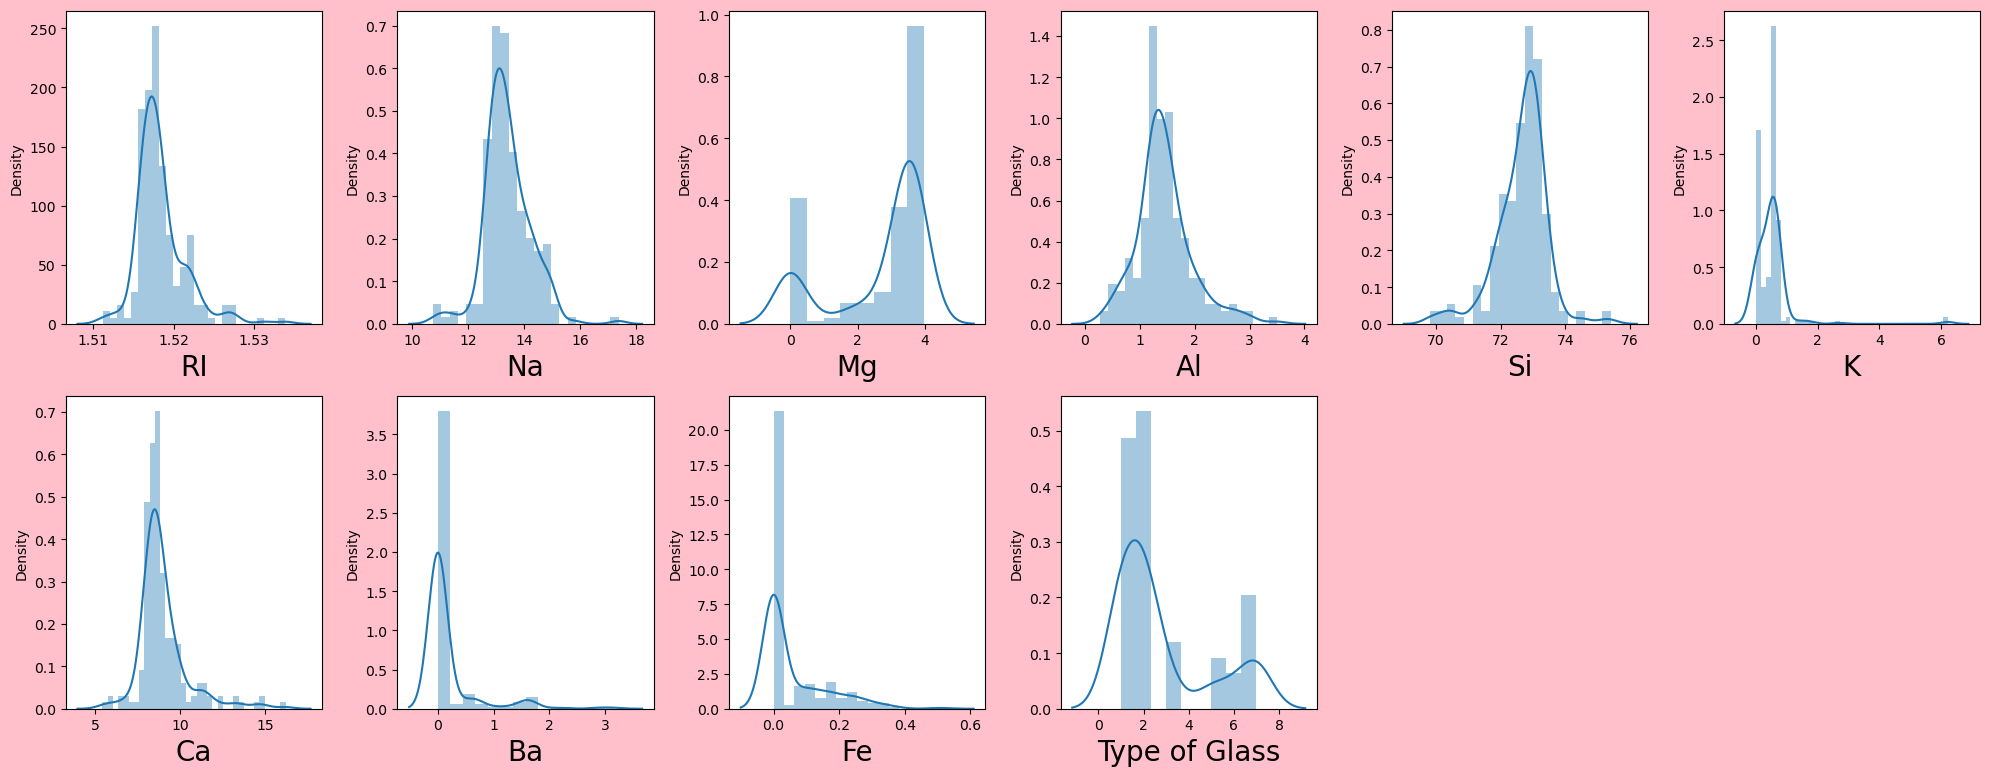

In [368]:
#to see the distribution among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Apart from al column all the columns have slight skewness and outliers present in them so they have slight unsymmentric distribution in the dataset.

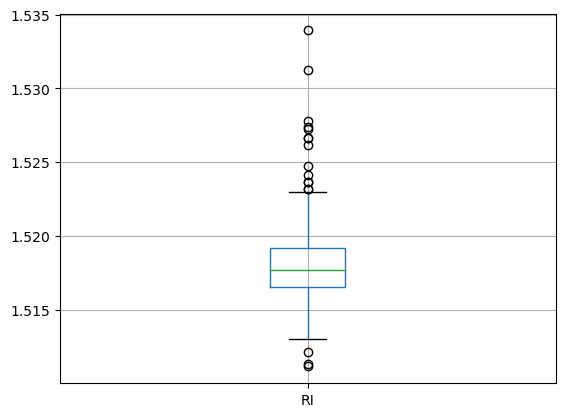

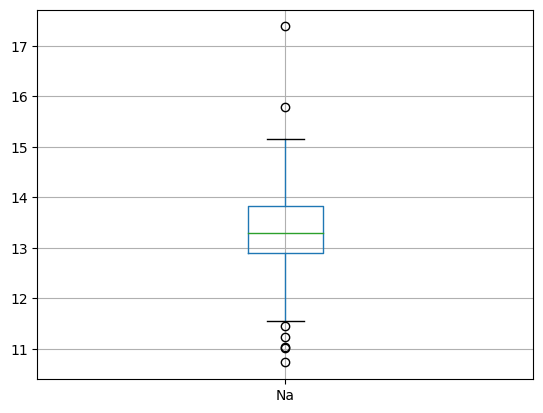

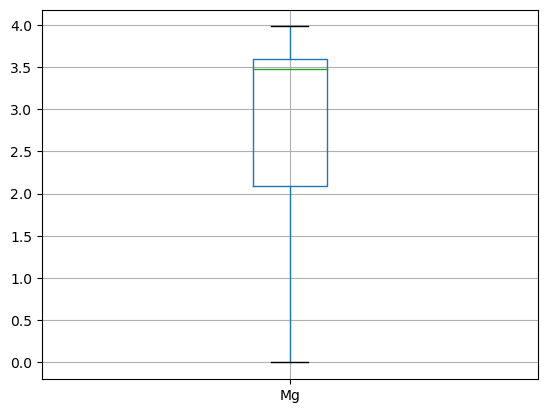

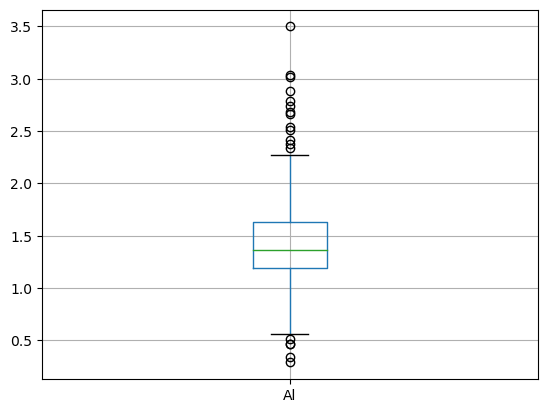

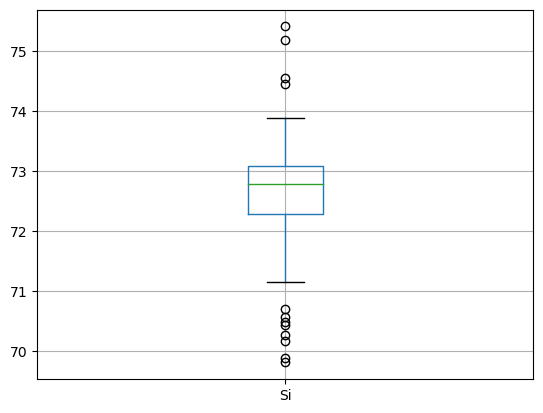

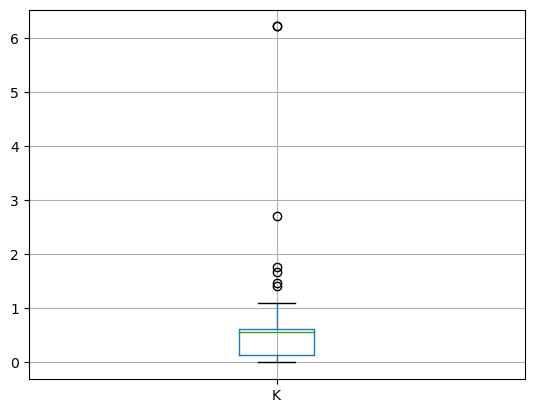

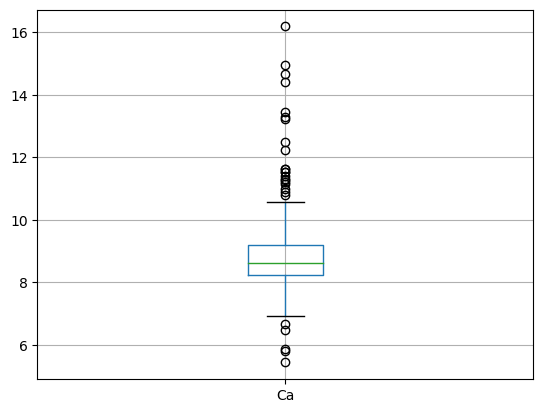

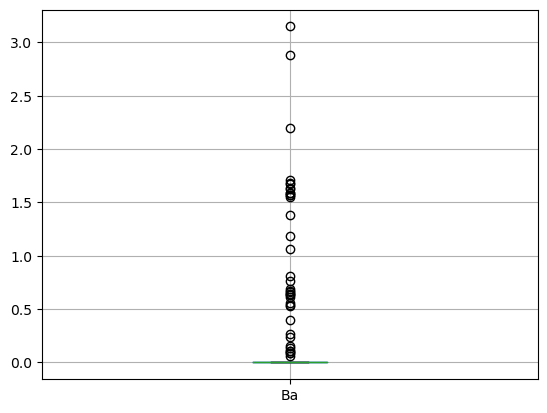

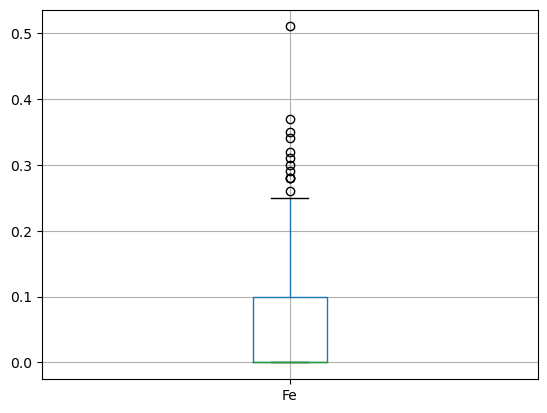

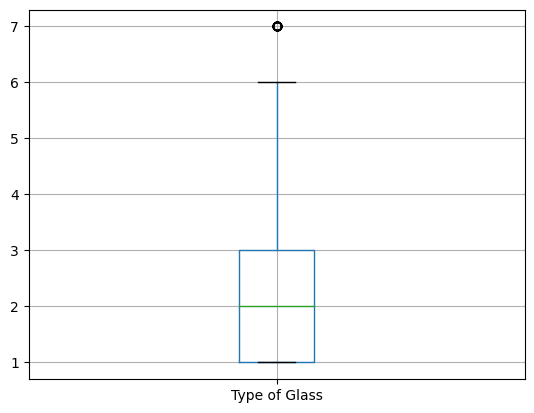

In [309]:
#to know about the outliers
for column in df:
    plt.figure()
    df.boxplot([column])

In [403]:
#To view the z-score
import scipy.stats as stats
z = np.abs(stats.zscore(X))
z=X

In [404]:
#To view the corelation
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
RI,1.000000,-0.201501,-0.117130,-0.416574,-0.540359,-0.209223,0.804777,-0.091052,0.135799,-0.161504
Na,-0.201501,1.000000,-0.261535,0.080535,-0.074824,-0.528648,-0.276169,0.409950,-0.195034,0.493235
Mg,-0.117130,-0.261535,1.000000,-0.374347,-0.165647,0.447219,-0.398879,-0.547593,0.097130,-0.700392
Al,-0.416574,0.080535,-0.374347,1.000000,0.026821,0.117749,-0.288266,0.508589,-0.056761,0.539144
Si,-0.540359,-0.074824,-0.165647,0.026821,1.000000,-0.177126,-0.192163,-0.009782,-0.081790,0.145616
K,-0.209223,-0.528648,0.447219,0.117749,-0.177126,1.000000,-0.353358,-0.353397,0.116944,-0.438043
Ca,0.804777,-0.276169,-0.398879,-0.288266,-0.192163,-0.353358,1.000000,-0.148520,0.116666,-0.009840
Ba,-0.091052,0.409950,-0.547593,0.508589,-0.009782,-0.353397,-0.148520,1.000000,-0.037180,0.662932
Fe,0.135799,-0.195034,0.097130,-0.056761,-0.081790,0.116944,0.116666,-0.037180,1.000000,-0.208050
Type of Glass,-0.161504,0.493235,-0.700392,0.539144,0.145616,-0.438043,-0.009840,0.662932,-0.208050,1.000000


<Axes: >

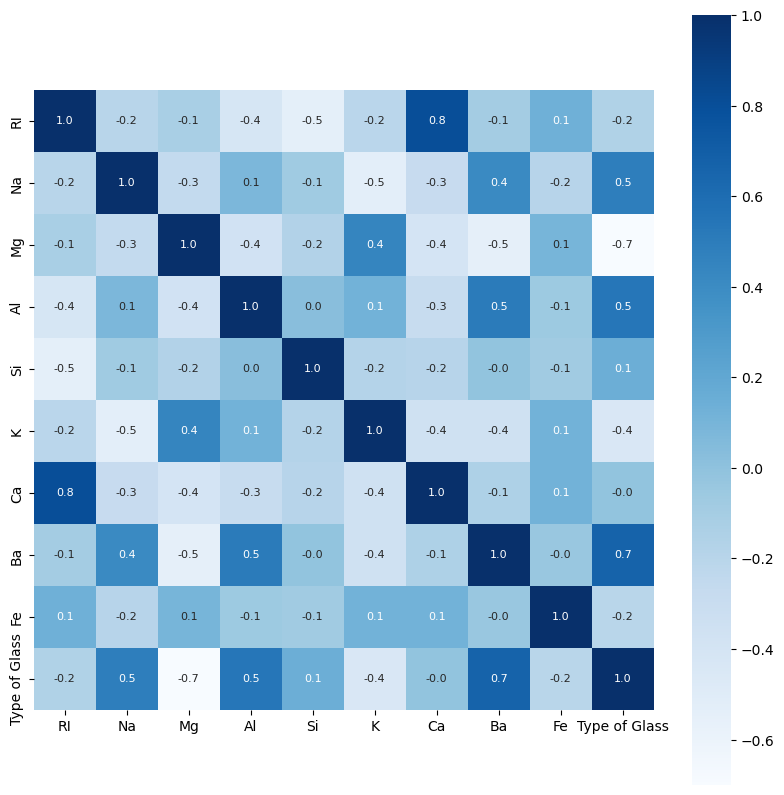

In [405]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap='Blues')

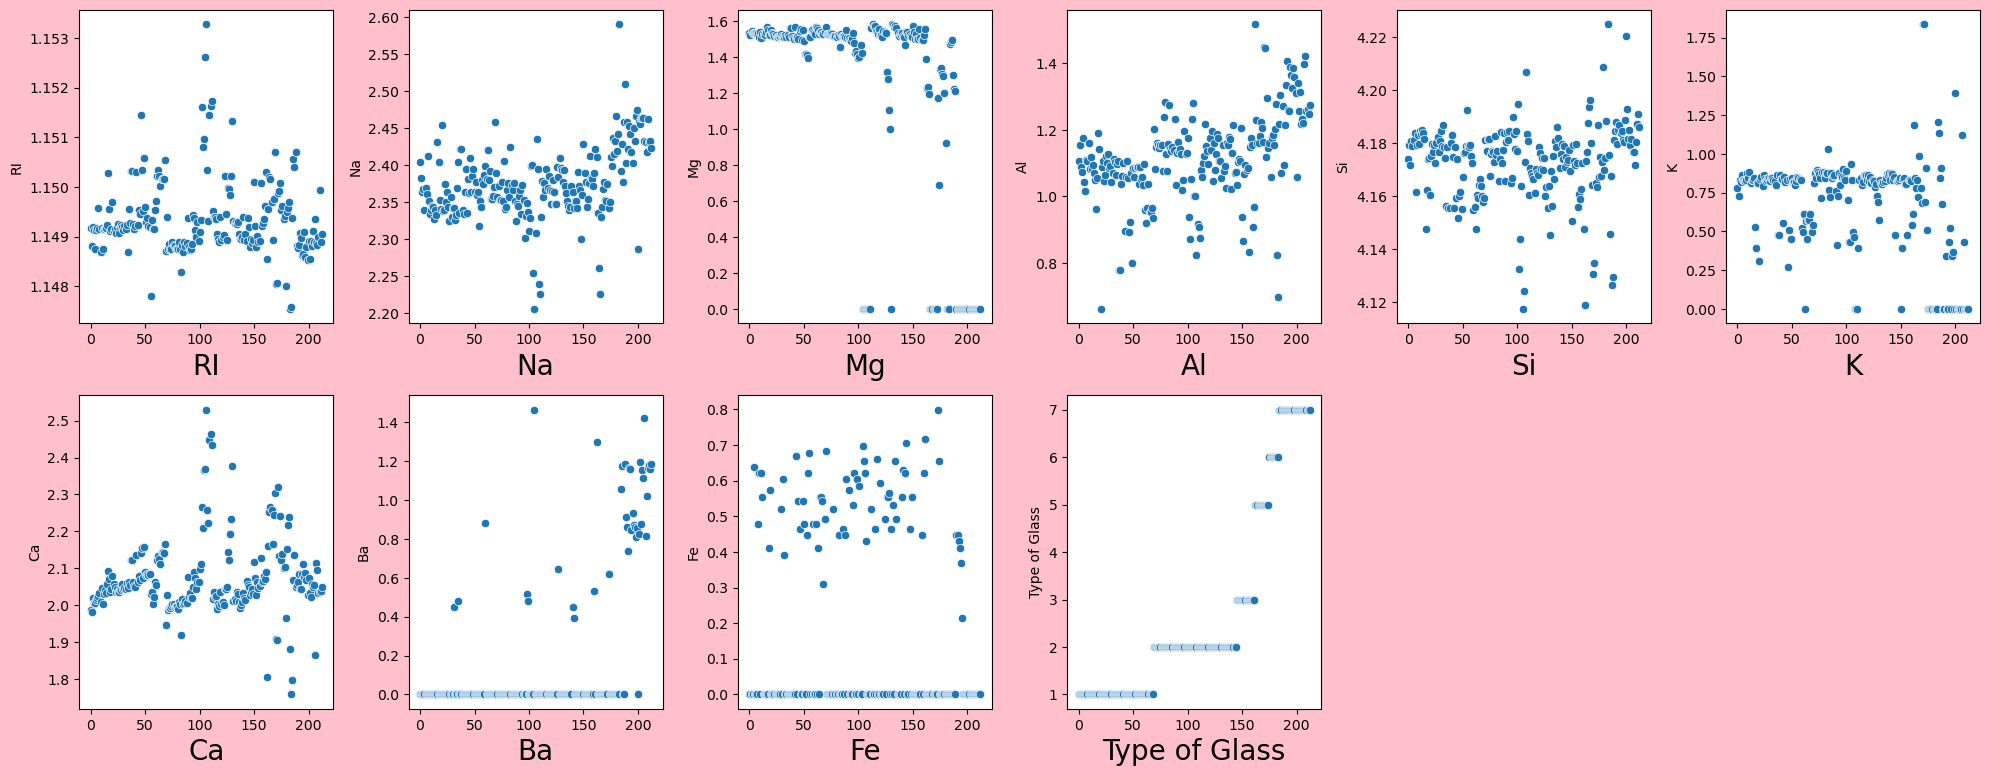

In [406]:
#To visalize the corelation
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,6,plotnumber)
        sns.scatterplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
The corelation between these columns are not much corelated.Most of the columns has zero corelation.

<function matplotlib.pyplot.show(close=None, block=None)>

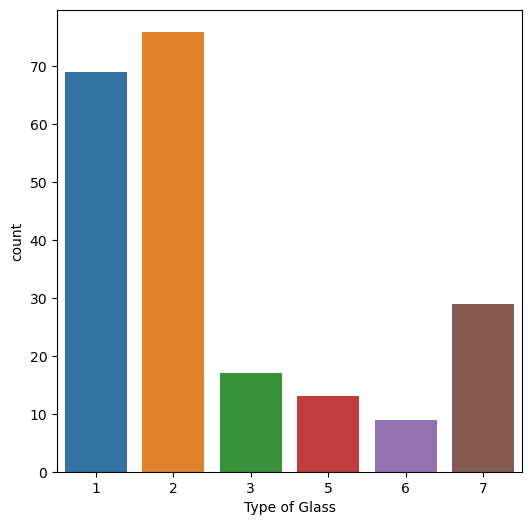

In [407]:
#to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(6,6))
sns.countplot(x="Type of Glass",data=df)
plt.show

In [408]:
#to see count numerically
df["Type of Glass"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

In [409]:
#Again checking the skewness
df.skew()

RI               1.631276
Na               0.177063
Mg              -1.434030
Al              -0.212025
Si              -0.791299
K               -0.602542
Ca               1.402709
Ba               2.065220
Fe               0.887382
Type of Glass    1.108861
dtype: float64

In [471]:
#removing the skewness using the cuberoot method: for fare column
df["RI"]=np.cbrt(df["RI"])
df["Mg"]=np.cbrt(df["Mg"])
df["K"]=np.cbrt(df["K"])
df["Ca"]=np.cbrt(df["Ca"])
df["Ba"]=np.cbrt(df["Ba"])
df["Fe"]=np.cbrt(df["Fe"])
df["Na"]=np.cbrt(df["Na"])
df["Al"]=np.cbrt(df["Al"])
df["Si"]=np.cbrt(df["Si"])

In [472]:
#skewness checking
df.skew()

RI               0.000000
Na               0.039140
Mg              -1.532997
Al              -0.850942
Si              -0.814457
K               -2.079562
Ca               1.064172
Ba               1.691950
Fe               0.734824
Type of Glass    1.108861
dtype: float64

With the help of cuberoot reducing the skewness in the dataset.

In [412]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [430]:
#Splitting the data into features and label
X=df.drop("Type of Glass",axis=1)
Y=df["Type of Glass"]


In [446]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=2)


# 1)Random Forest Classifier

In [447]:
#Model initialisation
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [448]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=RFC.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [449]:
#for training -Accuracy score
y_trpred=RFC.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [451]:
#Displaying the accuracy percentage:
print("Testing  Score for Random forest classifier is :",round(test_Accuracy*100,2))

Testing  Score for Random forest classifier is : 74.42


In [443]:
print(classification_report(y_test,y_tepred))

              precision    recall  f1-score   support

           1       0.63      0.90      0.75        21
           2       0.76      0.62      0.68        21
           3       1.00      0.25      0.40         4
           5       0.50      1.00      0.67         1
           6       1.00      0.67      0.80         3
           7       1.00      0.50      0.67         4

    accuracy                           0.70        54
   macro avg       0.82      0.66      0.66        54
weighted avg       0.76      0.70      0.69        54



                                StandardScaler :Standardization of features

In [436]:
#Model initialisation
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [437]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=2)


# 2 : LOGISTIC REGRESSION

In [426]:
#Model Instantiating and training:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [427]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=log_reg.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [428]:
#for training -Accuracy score
y_trpred=log_reg.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [429]:
#Displaying the accuracy percentage:
print("Training Score for logistic Regression Model is :",round(train_Accuracy*100,2))
print("Testing  Score for logistic Regression Model is :",round(test_Accuracy*100,2))

Training Score for logistic Regression Model is : 71.7
Testing  Score for logistic Regression Model is : 57.41


# 3: GRADIENT BOOSITNG ALGORITHM

In [453]:
#Model Instantiating and training:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [462]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=gbc.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [463]:
#for training -Accuracy score
y_trpred=gbc.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [464]:
#Displaying the accuracy percentage:
print("Testing  Score for Gradient Boosting Classifier Model is:",round(test_Accuracy*100,2))

Testing  Score for Gradient Boosting Classifier Model is: 79.07


# BUILDING A PREDICTIVE MODEL:

Random line from raw data:

"RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of Glass"

1.150699,2.508769,1.223161,1.094184,4.129707,0.676790,2.049593,1.188784,  0.000000,7

In [399]:
data=[1.150699,2.508769,1.223161,1.094184,4.129707,0.676790,2.049593,1.188784,  0.000000]

In [400]:
array=np.asarray(data)

In [460]:
final=array.reshape(1,-1)#reshaping the numpy array
prediction=RFC.predict(final)

In [461]:
prediction

array([7], dtype=int64)

Predicted output for type of glass   :7

Expected output for the type of glass:7

In [ ]:
#End of the project